# Исследование данных о российском кинопрокате



  Задача данного проекта изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю. 
Данные опубликованы на портале Министерства культуры. Они содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
  
  В ходе исследования нужно сделать следующее:

- Посмотреть, сколько фильмов выходило в прокат каждый год. Обратить внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализировать, как эта доля менялась по годам. Сделаеь вывод о том, какой период полнее всего представлен в данных.
- Изучить как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А когда максимальной?Посчитать среднюю и медианную сумму сборов для каждого года. 
- Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположить, с чем это может быть связано.
- Исследовать фильмы, которые получили государственную поддержку. Поискать интересные закономерности в данных. Посмотреть, сколько выделяют средств на поддержку кино. Проверить, хорошо ли окупаются такие фильмы, какой у них рейтинг.

## Загрузка файлов с данными и объединение их в один датафрейм. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
try:
    data = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')

data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
try:
    data_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    data_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

data_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [5]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [6]:
# Приведем к числовым значениям данные в столбце из первого датасета
data['puNumber'] = pd.to_numeric(data['puNumber'], errors='coerce').fillna(0)

In [7]:
#Удалим строку с некорректным номером прокатного удостоверения
data = data[data['puNumber'] != 0]

In [8]:
# Поменяем тип данных 
data['puNumber'] = data['puNumber'].astype(int)

In [9]:
# Объединим два датасета по столбцу с номером прокатного удостоверения
data = data.merge(data_shows, on='puNumber', how='left')

In [10]:
# Изменим название столбца
data.rename(columns = {'puNumber':'pu_number'}, inplace=True)

In [11]:
# Проверим как объединились два датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод:**
- Для объединения файлов мы изменили тип данных в одном из них, при этом была обнаружена строка с отсутствующим номером прокатного удостоверения. Эта строка была удалена.
- Было изменено название столбца **puNumber**
- После объединения двух датасетов все объекты из датасета mkrf_movies вошли в получившийся датафрейм, именно такая задача и стояла. 

## Предобработка данных

In [12]:
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,box_office
count,"7,485.00",332.00,332.00,332.00,"3,158.00"
mean,"135,196,587.56","11,864,457.83","48,980,988.89","127,229,716.68","76,478,696.16"
std,"38,352,919.34","24,916,555.26","59,980,117.92","188,588,333.12","240,353,122.82"
min,"1,811,096.00",0.00,0.00,0.00,0.00
25%,"112,025,118.00",0.00,"25,000,000.00","42,000,000.00","86,239.00"
50%,"121,015,510.00",0.00,"30,000,000.00","68,649,916.00","2,327,987.55"
75%,"124,003,314.00","15,000,000.00","40,375,000.00","141,985,319.50","23,979,671.02"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79"


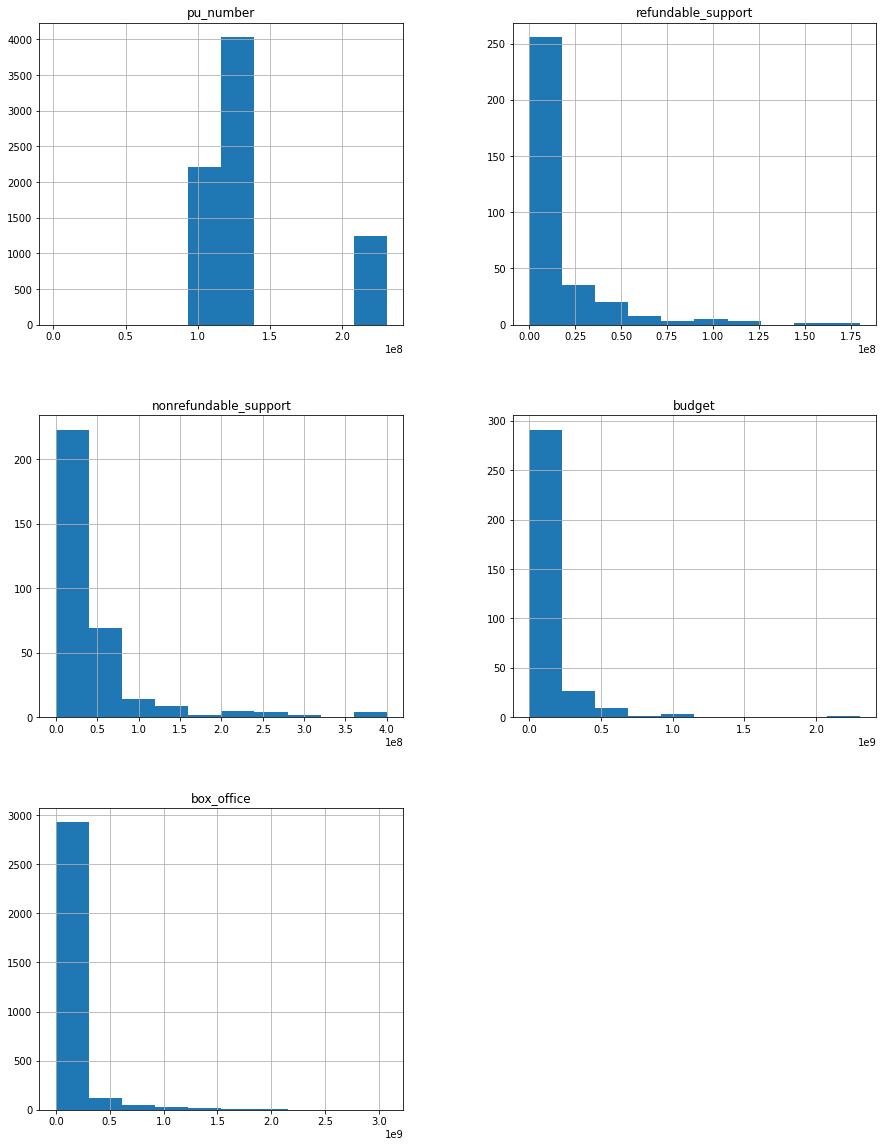

In [13]:
data.hist(figsize=(15,20));

**Вывод:**
- При первичном ознакомлении с данными, можно отметить наличие пропущенных значений в 10 столбцах из 15, причем больше всего пропусков в столбцах с данными о гос.поддержке. Видимо, это связано с небольшим количеством таких фильмов в этом датасете.
- Данные о кассовых сборах есть только по 3158 фильмам, что составляет менее половины от общего объема представленных картин.
- По гистаграмме с номерами прокатных удостоверений можно предположить, что существует разный тип нумерации для разных типов проката фильмов.

### Проверка типов данных

In [14]:
data.dtypes

title                     object
pu_number                  int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

In [15]:
# Изменим тип данных с датой на соответствующий формат
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d %H:%M:%S')

In [16]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [17]:
# В столбце рейтинга исправим значения, указанные в %
data['ratings'] = data['ratings'].str.replace('%','0')

In [18]:
# Преобразуем их в числовые значения
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

In [19]:
# Приведем к единообразному виду
data.loc[data['ratings'] > 100, 'ratings'] /= 100

**Вывод:**
- Изменили тип данных в столбце **show_start_date**, а также в столбце **ratings**. При замене скорректировали ряд значений рейтинга фильмов. Рейтинг фильмов определяется по 10-ти бальной шкале, поэтому мы привели значения, которые были указаны в процентах, к показателям в рейтингах (т.е. 97% заменили на 9.7, 21% на 2.1 и т.д.)

Еще можно изменить тип данных в столбцах **refundable_support, nonrefundable_support, budget и box_office**, но это мы сделаем после удаления пропусков.

#### Пропуски

In [20]:
# создаем копию датасета до преобразования
temp = data.copy() 
len(temp)

7485

In [21]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

In [22]:
# Посмотрим в процентном отношении
temp = data.copy()
display(pd.DataFrame(round((temp.isna().mean()*100),2), columns=['NaNs, %'])
        .style.format( '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
title,0.00
pu_number,0.00
show_start_date,0.00
type,0.00
film_studio,0.24
production_country,0.03
director,0.12
producer,7.59
age_restriction,0.00
refundable_support,95.56


In [23]:
# Удалим строки с пропусками, где их количество несущественно
data.dropna(subset=['film_studio', 'production_country', 'director' ], inplace=True)

In [24]:
# Заменим пропуски в столбцах, касающихся гос.поддержки, на нулевые значения. Поменяем тип данных
data[['refundable_support', 'nonrefundable_support', 'budget']] = (
    data[['refundable_support', 'nonrefundable_support', 'budget']].fillna(0).astype(int)
)

In [25]:
# По фильмам, не имеющих гос.поддерки, проставим "нет" в соответствующем столбце
data['financing_source'] = data['financing_source']. fillna('нет')

In [26]:
# Пропуски в столбцах с рейтингами и кассовыми сборами заменим на заглушки
data[['ratings', 'box_office']] = data[['ratings', 'box_office']].fillna(-1)

In [27]:
# Меняем тип данных
data['box_office'] = data['box_office'].astype(int)

In [28]:
# Пропуски в столбцах с продюсером и жанром фильма заменим на "unknown"
data[['producer', 'genres']] = data[['producer', 'genres']].fillna('unknown')

**Вывод:**
- Пропуски в столбцах **film_studio, production_country и director** мы удалили, т.к. их количество незначительно и не повлияет на результаты анализа.
- Пропуски в столбцах **refundable_support, nonrefundable_support и budget** заменили на **0**, поскольку по условию задания, если нет данных в столбце **budget**, то фильм не имеет гос.финансирования. На основании этого же заменили пропуски в **financing_source** на **"нет"**
- Пропуски в столбцах **producer и genres** заменили на **unknown**. Удалять их не стоит, т.к. количество большое. В дальнейшем исследовании будем это учитывать.
- Пропуски в столбцах **ratings и box_office** заменили на заглушки. Также поменяли тип данных

#### Дубликаты

In [29]:
# Проверим количество явных дубликатов
data.duplicated().sum()

0

In [30]:
# Проверим на дубликаты столбец с номером прокатного удостоверения
data[data['pu_number'].duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0,0,0,нет,7.60,"драма,мелодрама,история",-1
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0,0,0,нет,6.80,"комедия,криминал",-1


In [31]:
# Посмотрим на дубликаты внимательнее
data[data['pu_number'] == 221154310]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0,0,0,нет,7.00,"мелодрама,комедия",-1
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0,0,0,нет,7.60,"драма,мелодрама,история",-1


In [32]:
# Присвоим другой номер ПУ фильму, разным фильмам
data.loc[(data['pu_number'] == 221154310) & (data['title'] == 'Как жениться и остаться холостым'),'pu_number'] = 100000000

In [33]:
data[data['pu_number'] == 221054410]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0,0,0,нет,7.40,"комедия,криминал",-1
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0,0,0,нет,6.80,"комедия,криминал",-1


In [34]:
# Удалим строку с дублирующимся фильмом
data = data.drop(index=5066)

**Вывод:**
- Обнаружено два дубликата в номере прокатного удостоверения. Очевидно, что в первом случае эта ошибка носит случайный характер, а во втором, скорее всего, вносили изменения в данные о фильме и не присвоили новый номер. В одном случае мы удалили дубликат, потому что фильм был один и тот же. В другом случае - присвоили новый номер удостоверения.

#### Анализ категориальных значений

In [35]:
# Посмотрим какие ошибки встречаются в обозначении жанра фильма
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [36]:
# Посмотрим количество уникальных значений до исправления
data['type'].nunique()

8

In [37]:
# Уберем лишние пробелы в написании
data['type'] = data['type'].str.strip()

In [38]:
# Посмотрим как изменилось количество уникальных значений после исправления
data['type'].nunique()

6

In [39]:
# Посмотрим количество уникальных значений до исправления
data['director'].nunique()

4796

In [40]:
# Уберем лишние пробелы и символы в написании
data['director'] = data['director'].str.strip(r'\.\-\_\ ')

In [41]:
# Посмотрим как изменилось количество уникальных значений после исправления
data['director'].nunique()

4785

In [42]:
# Посмотрим количество уникальных значений до исправления
data['title'].nunique()

6745

In [43]:
# Уберем лишние пробелы и символы в написании
data['title'] = data['title'].str.strip(r'\.\-\_\ ')

In [44]:
# Заменим скобки в названии фильма на косой слеш
data['title'] = data['title'].str.replace('[\(\)]', '/', regex=True)

In [45]:
# Посмотрим как изменилось количество уникальных значений после исправления
data['title'].nunique()

6644

In [46]:
# Посмотрим какие ошибки встречаются в столбце с студиями
data['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [47]:
# Посмотрим какие ошибки встречаются в столбце со страной производства
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [48]:
# Посмотрим какие ошибки встречаются в столбце с именем продюссера
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'unknown',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [49]:
# Посмотрим какие ошибки встречаются в столбце с возрастными категориями
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [50]:
# Посмотрим какие ошибки встречаются в столбце с возрастными категориями
data['financing_source'].unique()

array(['нет', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [51]:
# Посмотрим какие ошибки встречаются в столбце с жанрами
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'unknown', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комед

**Вывод:**
- Почти во всех столбцах с категориальными значениями была обнаружена следующая проблема (за исключением столбцов **financing_source и age_restriction**): данные содержат очень много информации в одной ячейке. Для проведения анализа с этими ячейками, необходимо будет взять из них первые значения, что мы и сделаем в дальнейшем. Те столбцы, которые не будут задействованы в нашем исследовании, мы оставим без изменения.
- Также в категориальных значениях были обнаружены лишние символы в конце строк, такие как **пробел, нижнее подчеркивание, дефис, точка**. 
- Помимо этого, в столбце с названиями фильмов были приведены к единому виду обозначения скобок.
- Данные в столбцах **type, title, director** были очищены, в результате число уникальных значений в них сократилось 

#### Анализ числовых значений

In [52]:
# Посмотрим наличие строк, где общий бюджет меньше суммы возвратных и невозвратных средств
data[data['budget'] < data['refundable_support'] + data['nonrefundable_support']]['title'].count() 

17

In [53]:
# Исправим эти строки
def budg(x):
    if x['budget'] == 0:
        return x['refundable_support'] + x['nonrefundable_support']
    else:
        return x['budget']

data['budget'] = data.apply(budg, axis=1)

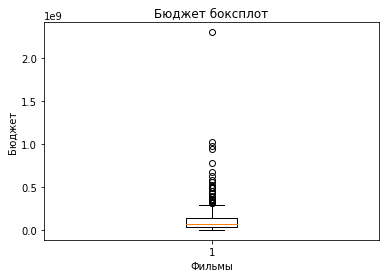

Статистические данные о бюджетах:


count             332.00
mean      131,422,395.80
std       187,148,242.67
min         6,000,000.00
25%        45,524,799.50
50%        71,196,901.50
75%       150,000,000.00
max     2,305,074,303.00
Name: budget, dtype: float64

In [54]:
# Посмотрим внимательнее на цифры в столбце бюджет
# Построим боксплот для фильмов с известным бюджетом
plt.boxplot(data.query('budget != 0')['budget'])
plt.title('Бюджет боксплот')
plt.xlabel('Фильмы')
plt.ylabel('Бюджет')
plt.show()

# Покажем статистические данные
print('Статистические данные о бюджетах:')
data.query('budget != 0')['budget'].describe()

In [55]:
data.query('budget != 0 & budget > 350000000')['budget'].count()

24

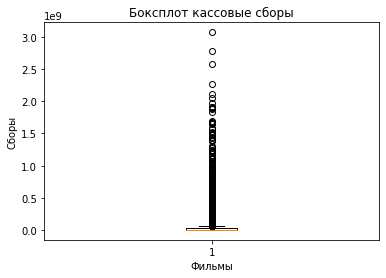

Статистические данные о сборах:


count           3,155.00
mean       76,551,328.59
std       240,455,853.40
min                 0.00
25%            87,090.50
50%         2,338,049.00
75%        23,995,460.00
max     3,073,568,690.00
Name: box_office, dtype: float64

In [56]:
# Посмотрим внимательнее на кассовые сборы
# Построим боксплот для кассовых сборов
plt.boxplot(data.query('box_office != -1')['box_office'])
plt.title('Боксплот кассовые сборы')
plt.xlabel('Фильмы')
plt.ylabel('Сборы')
plt.show()

# Покажем статистические данные
print('Статистические данные о сборах:')
data.query('box_office != -1')['box_office'].describe()

In [57]:
# Создадим столбец с годом выпуска фильма в прокат
data['Год выпуска фильма'] = data['show_start_date'].dt.year

In [58]:
# Посмотрим как менялась ситуация с кассовыми сборами по годам
box_pivot = data.query('box_office != -1')\
.pivot_table(index='Год выпуска фильма',
             values='box_office',
             aggfunc=['count','mean', 'median'])
box_pivot

,count,mean,median
,box_office,box_office,box_office
Год выпуска фильма,,,
2010,105,"23,130.04","1,700.00"
2011,109,"129,383.17","3,000.00"
2012,127,"54,417.90","5,560.00"
2013,184,"161,954.91","3,522.50"
2014,279,"26,684,415.19","18,160.00"
2015,465,"84,940,570.03","4,920,933.00"
2016,525,"91,173,533.46","3,915,041.00"
2017,357,"136,032,793.32","9,968,340.00"


**Вывод:**

- Обнаружены подозрительные данные в столбцах с цифрами государствееного финансирования. Так в 17 случаях сумма возвратных и невозвратных средств была больше общего бюджета фильма. Поскольку, во всех этих случаях в графе бюджет стоит **0** и изначально эти значения не были пропущены, значит можно предположить, что это данные по бюджету случайно не внесли. Раз мы знаем хотя бы долю гос.поддержки, можем приравнять ее к общему бюджету, это будет ближе к истине.
- В столбце, содержащем данные о бюджете фильма, наблюдается большой разброс данных, что говорит о большом количестве низко- и среднебюджетных фильмов (до 350 млн.руб) и высокобюджетных картин, которых здесь около 7%.
- В данных о кассовых сборах также есть большой разброс данных, очевидно, это связано с тем, что рынок кинопроката активно начал развиваться с 2014 года (о чем свидетельствует рост фильмов в кинопрокате). А так как в нашей выборке более четверти фильмов выпущено в прокат в период с 2010 по 2014 год, то и статистичесике данные имеют большой разброс. Удалять их из анализа нельзя, поскольку количество существенно


In [59]:
# Посмотрим как изменился датасет после предобработки
a, b = len(temp), len(data)
print(len(temp), len(data), round((a-b)/a*100, 2))

7485 7457 0.37


#### Добавление новых столбцов





In [60]:
def first_value(x):
    x = x.split(',')
    return x[0]
    
data['name_director'] = data['director'].apply(first_value)
data['main_genre'] = data['genres'].apply(first_value)

In [61]:
def support(x):
    if x['budget'] != 0:
        return (x['refundable_support'] + x['nonrefundable_support']) / x['budget']
    else:
        return 0

data['ratio_support'] = data.apply(support, axis=1)

**Вывод:**
В процессе предобработки данных была сделано следующее:
- Пропуски в столбцах **film_studio, production_country и director** удалены.
- Пропуски в столбцах **refundable_support, nonrefundable_support и budget** заменили на **0**
- Пропуски в **financing_source** заменили на **"нет"**
- Пропуски в столбцах **producer и genres** заменили на **unknown**.
- Пропуски в столбцах **ratings и box_office** заменили на заглушки. 
- В одном случае был удален дубликат, в другом случае - исправлен.
- Также были изменены некоторые типы данных
- Почти во всех столбцах с категориальными значениями была обнаружена следующая проблема : данные содержат очень много информации в одной ячейке. Для проведения анализа с этими ячейками, мы взяли из них первые значения и создали новые столбцы. Те столбцы, которые не будут задействованы в нашем исследовании, мы оставили без изменения.
- Также в категориальных значениях были обнаружены лишние символы в конце строк, они были удалены
- Обнаружены подозрительные данные в столбцах с цифрами государствееного финансирования. Так в 17 случаях сумма возвратных и невозвратных средств была больше общего бюджета фильма. Эту ситуацию исправили
- В столбце, содержащем данные о бюджете фильма, наблюдается большой разброс данных, что говорит о большом количестве низко- и среднебюджетных фильмов (до 350 млн.руб) и высокобюджетных картин, которых здесь около 7%.
- В данных о кассовых сборах также есть большой разброс данных, очевидно, это связано с тем, что рынок кинопроката активно начал развиваться с 2014 года (о чем свидетельствует рост фильмов в кинопрокате). А так как в нашей выборке более четверти фильмов выпущено в прокат в период с 2010 по 2014 год, то и статистичесике данные имеют большой разброс. Удалять их из анализа нельзя, поскольку количество существенно
- Добавили новые столбцы с первыми значениями имени режиссера и жанра фильма. А также столбец с годом выпуска фильма в прокат  

## Исследовательский анализ данных


Посмотрим, сколько фильмов выходило в прокат каждый год и посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

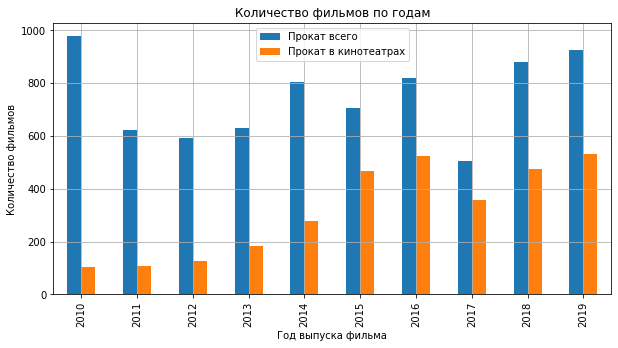

,Прокат всего,Прокат в кинотеатрах,Доля проката в кинотеатрах
Год выпуска фильма,,,
2010,979,105,0.11
2011,620,109,0.18
2012,592,127,0.21
2013,629,184,0.29
2014,805,279,0.35
2015,705,465,0.66
2016,817,525,0.64
2017,505,357,0.71
2018,879,474,0.54


In [62]:
# Создаем таблицу с количеством выпущенных фильмов по годам
pivot_show_start = data.pivot_table(
    index=['Год выпуска фильма'],
    values=['title'],
    aggfunc='count')

# Создаем таблицу с количеством проката в кинотеатрах по годам
pivot_cinema = data.query('box_office != -1').pivot_table(
    index=['Год выпуска фильма'],
    values=['box_office'],
    aggfunc='count')

# Объединяем две таблицы
pivot_total = pivot_show_start.merge(pivot_cinema, on='Год выпуска фильма')

# Переименовываем столбцы для удобного восприятия
pivot_total = pivot_total.rename(columns={
    'title':'Прокат всего',
    'box_office': 'Прокат в кинотеатрах'
})

# Построим барчарт по данным о прокате в целом, и о прокате в кинотеатрах
pivot_total.plot(
    kind='bar',
    figsize = (10, 5),
    grid = True,
    title='Количество фильмов по годам',
    ylabel='Количество фильмов'
)
plt.show()

# Добавляем столбец с долевыми значениями
pivot_total['Доля проката в кинотеатрах'] =( 
    pivot_total['Прокат в кинотеатрах'] / pivot_total['Прокат всего']
)


pivot_total.round(2)

**Вывод:**
- Из данных видно, что количество фильмов, выпущенных в общий прокат, имеет волновой характер от года к году. Наибольший объем фильмов был выпущен в 2010 году, периоды спада:  2011 - 2013 года, а также 2017 год. Периоды роста количества: с 2014 по 2016 год и с 2018 по 2019 год. Наименьший объем зафиксирован в 2017 году, в цифрах этот показатель почти вдвое меньше уровня 2010 года.
- Анализируя данные о прокате фильмов в кинотеатрах, надо отметить, что объем сведений был неполный, данные имелись только о 3158 картинах, что составляет 42% от общего количества. Это, конечно, повлияло на долевые значения в нашей таблице. Тем не менее, на основе этих данных можно сделать вывод, что количество выходящих в прокат в кинотеатрах фильмов постоянно растет (опять же, за исключением 2017 года). Это говорит о развитии этого сегмента рынка. За последние годы доля проката фильмов в кинотеатрах держится в районе 0.6 от общего объема выпускаемых картин 

Посмотрим как менялась динамика проката по годам. В каком году сумма сборов была минимальной и максимальной. С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

,count,sum,mean,median
,Прокат в кинотеатрах,Прокат в кинотеатрах,Прокат в кинотеатрах,Прокат в кинотеатрах
Год выпуска фильма,,,,
2010,105,2428654,"23,130.00","1,700.00"
2011,109,14102765,"129,383.00","3,000.00"
2012,127,6911073,"54,418.00","5,560.00"
2013,184,29799704,"161,955.00","3,522.00"
2014,279,7444951839,"26,684,415.00","18,160.00"
2015,465,39497365062,"84,940,570.00","4,920,933.00"
2016,525,47866105069,"91,173,533.00","3,915,041.00"
2017,357,48563707214,"136,032,793.00","9,968,340.00"


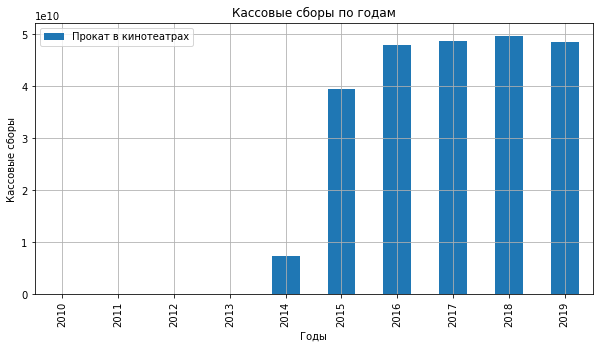

In [63]:
# Создаем таблицу с показателями проката в кинотеатрах по годам
pivot_rental = data.query('box_office != -1').pivot_table(
    index=['Год выпуска фильма'],
    values=['box_office'],
    aggfunc=['count', 'sum', 'mean', 'median']
)
# Переименуем столбец для удобного восприятия
pivot_rental = pivot_rental.rename(columns={
    'box_office':'Прокат в кинотеатрах'})
    
# Построим барчарт для наглядности
pivot_rental['sum'].plot(kind='bar', figsize = (10, 5), grid=True)
plt.title('Кассовые сборы по годам')
plt.ylabel('Кассовые сборы')
plt.xlabel('Годы')

pivot_rental.round()

In [65]:
# Создадим таблицу с топ самых кассовых фильмов
pivot_top = data.query('box_office != -1')\
    .pivot_table(index=['title'], values='box_office')\
    .sort_values(by='box_office', ascending=False)

# Переименуем столбцы для удобного восприятия
pivot_top = pivot_top.rename(columns={
    'box_office':'Кассовый сбор'})

pivot_top.head(10)

,Кассовый сбор
title,
Холоп,"3,073,568,690.00"
Движение вверх,"2,779,686,144.00"
Мстители: Финал,"2,576,613,776.00"
Т-34,"2,271,754,004.00"
Пираты Карибского моря: Мертвецы не рассказывают сказки,"2,118,396,119.00"
Тайная жизнь домашних животных. Миньоны против газона,"1,971,005,085.00"
Веном,"1,913,257,923.00"
Малефисента: Владычица тьмы,"1,911,944,865.00"
Джокер,"1,890,368,076.00"


**Вывод:**

- Динамику кассовых сборов по годам можно назвать возрастаюшей. Если в 2010 году этот показатель был на уровне 2,4 млн.руб, то к 2019 году результаты выросли до отметок в 49 млрд.руб. Наибольшие сборы были в 2018г - 49,7 млрд.руб, наименьшие в 2010г - 2,4 млн.руб. Рейтинг по кассовым сборам возглавляет ффильм "Холоп" с суммой - 3,07 млрд.руб.
- Стоит обратить внимание на показатели медианы и среднего значения по годам. Из полученных данных хорошо видно, что медиана гораздо ниже среднего. Это говорит о том, что существует большой разброс по кассовым сборам. В каждом году есть фильмы, у которых кассовые сборы на несколько порядков выше, чем у всех остальных.

Определим как влияет возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Фильмы с каким возрастным ограничением собрали больше всего денег в прокате. И меняется ли картина в зависимости от года.

In [66]:
# Посмотрим как обозначаются категории в датасете
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [67]:
# Создадим столбец с категориальными значениями возрастов, для этого создадим функцию
def ages(row):
    try:
        if '0+' in row:
            return '0+'
        elif '16+' in row:
            return '16+'
        elif '12+' in row:
            return '12+'
        elif '18+' in row:
            return '18+'
        else:
            return '6+'
    except:
        return 'нет категории'
    
data['Ограничение по возрасту'] = data['age_restriction'].apply(ages)

In [68]:
# Создадим таблицу с данными о кассовых сборах по каждому году в разрезе категорий
age_group_films = data[(data['Год выпуска фильма'] > 2014) & (data['box_office'] != -1)]\
.pivot_table(
    index=['Год выпуска фильма'],
    columns=['Ограничение по возрасту'],
    values=['box_office'],
    aggfunc=['sum'])

# Переименуем столбец для лучшей визуализации
age_group_films = age_group_films.rename(columns={
    'box_office':'Кассовые сборы по возрастным группам'})

# Округлим значения
age_group_films.round()

sum               \
                        Кассовые сборы по возрастным группам                
Ограничение по возрасту                                   0+          12+   
Год выпуска фильма                                                          
2015                                               379054567  13616081989   
2016                                               150034312  12204446503   
2017                                               229598930   7851427659   
2018                                                32449001  14267250411   
2019                                                17746066  12680198743   

                                                                
                                                                
Ограничение по возрасту          16+          18+           6+  
Год выпуска фильма                                              
2015                     11368120823   5432308329   8701799354  
2016                     16664548492   6793929771  12053145991  
2017                     18745042899   9651495581  12086142145  
2018                     16503602284   8760085436  10104974592  
2019                     12753418927  10121796238  12852548618

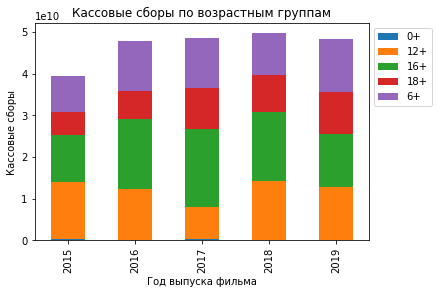

In [69]:
# Построим барчарт для наглядности
age_group_films.plot(stacked=True, kind='bar')
plt.legend(['0+', '12+', '16+', '18+', '6+'], bbox_to_anchor = (1 , 1))
plt.ylabel('Кассовые сборы')
plt.title('Кассовые сборы по возрастным группам');

In [70]:
# Построим таблицу с общим количеством фильмов в прокате по годам в разрезе категорий
age_group_count = data[(data['Год выпуска фильма'] > 2014) & (data['box_office'] != -1)]\
.pivot_table(
    index=['Год выпуска фильма'],
    columns=['Ограничение по возрасту'],
    values=['box_office'],
    aggfunc=['count'],
    margins=True)

# Переименуем столбец для лучшей визуализации
age_group_count = age_group_count.rename(columns={
    'box_office':'Количество фильмов в прокате'})

# Округлим значения
age_group_count.round()

count                          
                        Количество фильмов в прокате                          
Ограничение по возрасту                           0+  12+  16+  18+   6+   All
Год выпуска фильма                                                            
2015                                              39   73  168  132   53   465
2016                                              40   82  182  151   70   525
2017                                               3   41  121  147   45   357
2018                                               5   66  156  179   68   474
2019                                               3   85  178  183   81   530
All                                               90  347  805  792  317  2351

**Вывод:**
- Из наших данных видно, что на сумму кассовых сборов влияет не только общее количество фильмов той или иной категории. Так, например, можно заметить, что фильмы "6+" и "12+" имеют примерно одинаковую долю в структуре сборов от года к году. Фильмы категории "16+" имеют тенденцию к снижению доли в общей массе сборов, а фильмы "18+", наоборот, свою долю увеличивают. Возможно, это связано с тем, что Минкульт ужесточает критерии присвоения той или иной возрастной категории фильму, и кинопроизводители, в свою очередь стали завышать уровень категории, чтобы он наверняка совпал с оценкой Минкульта. Это сокращает их издержки на перевыпуск рекламных и информационных материалов к фильму. 

### Анализ фильмов, которые получили государственную поддержку

In [71]:
# Выведем фильмы с гос.поддержкой в отдельную переменную
support_films = data[data['budget'] != 0]

# Переименуем столбцы для лучшего восприятия
support_films = support_films.rename(columns={
    'ratings':'Рейтинг',
    'title':'Название фильма',
    'name_director': 'Режиссер',
    'main_genre': 'Жанр',
    'box_office': 'Сборы'})

# Добавим столбец с общей суммой гос.поддержки
support_films['Всего гос.поддержка'] = \
support_films['refundable_support'] + support_films['nonrefundable_support']

In [72]:
# Создадим таблицу с суммами средств гос.поддержки по годам
pivot_support = support_films.pivot_table(
    index=['Год выпуска фильма'],
    values=['budget', 'refundable_support', 'nonrefundable_support', 'Всего гос.поддержка'],
    aggfunc=['count','sum']
)


In [73]:
# Сделаем из таблицы отдельный датасет
df_support = pivot_support.reset_index()

df_support.columns = \
['Год выпуска фильма',\
 '1',\
 '2',\
 '3',\
 'Количество фильмов',\
 'Бюджет фильма',\
 'Возвратная часть',\
 'Невозвратная часть',\
 'Всего гос.поддержка']



In [74]:
# Уберем лишнее
df_support = df_support.drop(['1', '2', '3'], axis=1)

# И добавим новые столбцы датасет
df_support['Доля возврата'] = \
df_support['Возвратная часть'] / df_support['Всего гос.поддержка']

df_support['Доля невозврата'] = \
df_support['Невозвратная часть'] / df_support['Всего гос.поддержка']

df_support['Доля поддержки в бюджете'] = \
df_support['Всего гос.поддержка'] / df_support['Бюджет фильма']

df_support.round(2)

,Год выпуска фильма,Количество фильмов,Бюджет фильма,Возвратная часть,Невозвратная часть,Всего гос.поддержка,Доля возврата,Доля невозврата,Доля поддержки в бюджете
0,2013,2,255435390,134347945,0,134347945,1.00,0.00,0.53
1,2014,16,1302484783,501002299,71000000,572002299,0.88,0.12,0.44
2,2015,86,7738669207,3019088340,637153119,3656241459,0.83,0.17,0.47
3,2016,61,7554942748,3381655482,921500000,4303155482,0.79,0.21,0.57
4,2017,41,7057172568,2464624781,719346881,3183971662,0.77,0.23,0.45
5,2018,56,7000664099,2784969465,662000000,3446969465,0.81,0.19,0.49
6,2019,70,12722866609,3976000000,928000000,4904000000,0.81,0.19,0.39


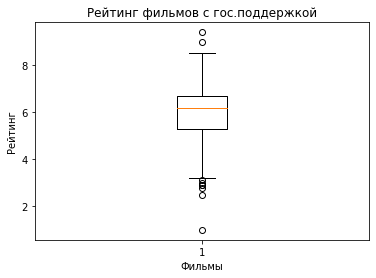

Статистические данные о рейтингах:


count   316.00
mean      6.02
std       1.15
min       1.00
25%       5.30
50%       6.20
75%       6.70
max       9.40
Name: Рейтинг, dtype: float64

In [75]:
# Построим боксплот по рейтингам фильмов с гос.поддержкой
plt.boxplot(support_films.query('Рейтинг != -1')['Рейтинг'])
plt.title('Рейтинг фильмов с гос.поддержкой')
plt.xlabel('Фильмы')
plt.ylabel('Рейтинг')
plt.show()

# Покажем статистические данные
print('Статистические данные о рейтингах:')
support_films.query('Рейтинг != -1')['Рейтинг'].describe()

In [76]:
# Посмотрим  на топ20 фильмов с высоким и низким рейтингом
top_ratings = support_films.query('Рейтинг != -1')\
[['Название фильма', 'Режиссер', 'Жанр', 'Рейтинг']]\
.sort_values(by='Рейтинг', ascending=False)\
.reset_index()
top_ratings = top_ratings.drop(['index'], axis=1)
top_ratings.head(20)

,Название фильма,Режиссер,Жанр,Рейтинг
0,Главный,Ю.Кара,фантастика,9.40
1,Я умею вязать,Н.Степанова при участии С.Иванова,драма,9.00
2,БОЛЬШОЙ,В.Тодоровский,криминал,8.50
3,А зори здесь тихие,Р.Давлетьяров,драма,8.50
4,Миллиард,Р.Прыгунов,драма,8.20
5,Пока еще жива,А.Атанесян,драма,8.10
6,Мотылёк,К.Худяков,драма,8.00
7,Байкал - Сердце мира 3D,А.Попова,семейный,8.00
8,Герой,К.Оганисян,фэнтези,7.90
9,Однажды,Р.Давлетьяров,драма,7.90


In [77]:
top_ratings.tail(20)

,Название фильма,Режиссер,Жанр,Рейтинг
296,БЕРЦЫ,Е.Миндадзе (псевдоним Катя Шагалова),драма,4.20
297,"Однажды в Америке, или Чисто русская сказка",Д.Панченко,комедия,4.20
298,Проигранное место,Н.Михалкова,ужасы,4.00
299,Танцы насмерть,А.Волгин,фантастика,4.00
300,Женщины против мужчин: Крымские каникулы,Л.Марголин,комедия,3.90
301,Танцуй со мной /2015/,М.Шевчук,мелодрама,3.90
302,12 месяцев. Новая сказка,Д.Елеонский,семейный,3.80
303,Гурвинек. Волшебная игра,И.Евланникова,мультфильм,3.50
304,Неуловимые: последний герой,А.Аксененко,мелодрама,3.30
305,Война полов,К.Кузин,комедия,3.20


In [78]:
# Посмотрим какой общий бюджет фильмов с гос.поддержкой
print('Общий бюджет фильмов с гос.поддержкой:', 
      df_support['Бюджет фильма']. sum(),'руб')

# Посмотрим сколько средств было выделено из гос.бюджета на финансирование фильмов
print('В том числе выделено из гос.бюджета на финансирование фильмов:', 
      df_support['Всего гос.поддержка'].sum(), 'руб')

# Посмотрим какую сумму кассовых сборов собрали фильмы с господдержкой
print('Cумма кассовых сборов фильмов с господдержкой:', 
      support_films['Сборы']. sum(),'руб')

# Рассчитаем процент окупаемости фильмов с господдержкой
ratio_payback = support_films['Сборы'].sum() / df_support['Бюджет фильма'].sum() *100

print('Процент окупаемости фильмов с господдержкой:', ratio_payback.round(2), '%')

Общий бюджет фильмов с гос.поддержкой: 43632235404 руб
В том числе выделено из гос.бюджета на финансирование фильмов: 20200688312 руб
Cумма кассовых сборов фильмов с господдержкой: 42113509468 руб
Процент окупаемости фильмов с господдержкой: 96.52 %


In [79]:
# Посмотрим на самые кассовые фильмы и их рейтинги
support_films.query('Сборы != -1 & Рейтинг != -1').pivot_table(
    index= ['Название фильма', 'Режиссер'],
    values = ['Сборы', 'Рейтинг','Всего гос.поддержка'])\
.sort_values(by='Сборы', ascending=False).head(10)

,,Всего гос.поддержка,Рейтинг,Сборы
Название фильма,Режиссер,,,
Холоп,К.Шипенко,60000000,6.80,3073568690
Движение вверх,А.Мегердичев,400000000,7.50,2779686144
Т-34,А.Сидоров,180000000,6.50,2271754004
Последний богатырь,Д.Дьяченко,100000000,6.80,1655037688
Экипаж,Н.Лебедев,442104482,7.60,1402255390
Притяжение /2016/,Ф.Бондарчук,250000000,5.60,1038321489
Ёлки Новые,Д.Киселев,100000000,5.80,855451052
Тренер,Д.Козловский,260000000,6.80,820528005
Три богатыря и принцесса Египта,К.Феоктистов,50000000,5.50,759226773


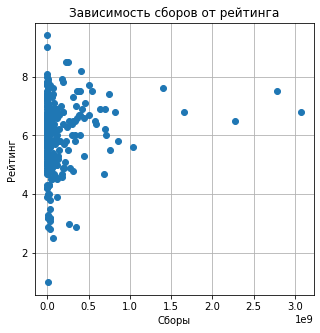

Корреляция сборов и рейтинга: 0.14


In [80]:
# Построим график зависимости сборов и рейтингов фильмов
( 
    support_films.query('Сборы != -1 & Рейтинг != -1')\
    .pivot_table(index='Сборы', values='Рейтинг')
          .plot(grid=True,
          style='o',
          figsize=(5, 5),
          title='Зависимость сборов от рейтинга', 
          xlabel='Сборы',
          ylabel='Рейтинг',
          legend=False)
)
plt.show()

print(
    'Корреляция сборов и рейтинга:',
    support_films.query('Сборы != -1 & Рейтинг != -1')['Сборы']
    .corr(support_films.query('Сборы != -1 & Рейтинг != -1')['Рейтинг']).
    round(2))

In [81]:
# Посмотрим каким режиссерам больше всего было выделено гос.средств
support_films.query('Сборы != -1').pivot_table(
    index= 'Режиссер',
    values = ['Сборы', 'Всего гос.поддержка'])\
.sort_values(by='Всего гос.поддержка', ascending=False).head(10)

,Всего гос.поддержка,Сборы
Режиссер,,
А.Кравчук,"500,000,000.00","717,703,185.00"
А.Мизгирев,"450,000,000.00","364,285,139.00"
Н.Лебедев,"442,104,482.00","1,402,255,390.00"
А.Мегердичев,"400,000,000.00","2,779,686,144.00"
И.Шурховецкий,"350,000,000.00","590,405,065.00"
А.Учитель,"300,000,000.00","511,775,548.00"
О.Степченко,"270,000,000.00","333,597,059.00"
Д.Козловский,"260,000,000.00","820,528,005.00"
И.Джендубаев,"250,000,000.00","110,171,448.00"


In [82]:
# Посмотрим как распределяются гос.средства в зависимости от жанра фильма
support_films.pivot_table(
    index= 'Жанр',
    values = ['Всего гос.поддержка'])\
.sort_values(by='Всего гос.поддержка',ascending=False).round()

,Всего гос.поддержка
Жанр,
история,"255,000,000.00"
спорт,"151,666,667.00"
фантастика,"127,818,182.00"
приключения,"99,428,571.00"
детектив,"97,000,000.00"
фэнтези,"93,900,000.00"
криминал,"93,333,333.00"
мультфильм,"79,403,871.00"
мюзикл,"60,113,280.00"


<AxesSubplot:title={'center':'Распределение по возрастным категориям'}>

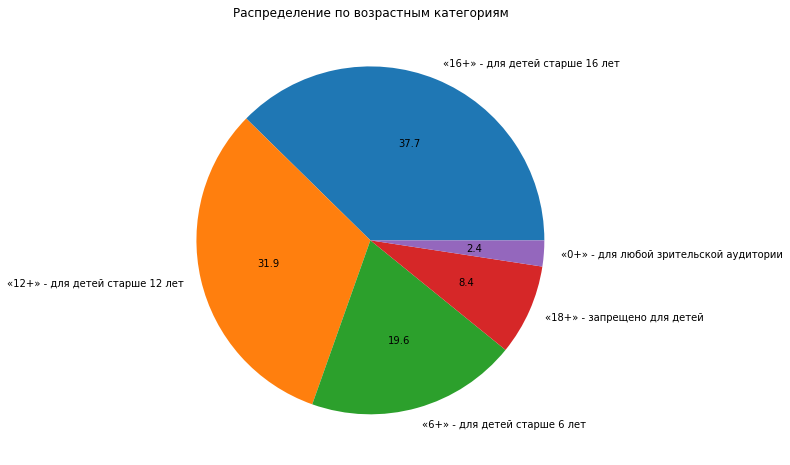

In [83]:
support_films['age_restriction'].value_counts()\
        .plot(y='count',
              kind='pie',
              autopct='%.1f',
              figsize=(8, 8),
              title='Распределение по возрастным категориям',
              ylabel='')

**Вывод:**

Следует отметить, что в исходном датасете представлено очень мало картин, которые пользовались гос.поддержкой. Тем не менее, в результате анализа таких фильмов выявлено следующее:
- В среднем каждый год финансируется государством около 50 фильмов
- Сумма гос.поддержки, в среднем, составляет около 60 млн.руб на одну картину
- Гос.поддержка составляет около 50% от общего бюджета фильма, в т.ч. возвратная часть колеблется в районе 80% от выделенной суммы и 20% - невозвратная. Невозвратная часть выросла за последние годы, видимо, это связано с низкой окупаемостью фильмов
- Основная масса фильмов с господдержкой имеет рейтинг в диапазоне от 5,3 до 6,7 (по 10-бальной шкале). Есть фильмы, например, картина Ю.Кара "Главный", который получил высокий рейтинг - 9,4. Также в списке присутствуют фильмы с очень низким рейтингом. Стоит отметить, что рейтинг практически не коррелирует с кассовыми сборами фильма. Очевидно, на сборы большое влияние оказывает реклама и маркетинг. Самым кассовым стал фильм К.Шипенко "Холоп" с рейтингом 6,8
- Бюджет фильмов с гос.поддержкой составил 43,6 млрд.руб, в т.ч. было выделено в качестве гос.поддержки более 20 млрд.руб. Сумма кассовых сборов по ним составила более 42 млрд.руб. Таким образом, можно сказать, что в целом это предпритие убыточно, т.к. процент окупаемости на уровне 96,5 %
- Самый финансируемый режиссер - А.Кравчук. 
- Больше всего денег государство выделило на фильмы исторического жанра, что говорит о его желании формировать у населения определенные взгляды на исторические события
- Основная масса фильмов с господдержкой (почти 70%) снята для аудитории 12+ и 16+. Следовательно, молодежь для государства является приоритетным потребителем его информационной политики.

## Общий вывод

**ВЫВОД:**

Целью данной работы было изучение данных российского кинопроката и выявление текущих трендов. Отдельное внимание было уделено фильмам, которые получили государственную поддержку. Для этой работы мы объединили данные Министерства культуры, а также информацию с сайта КиноПоиск.

`Особенности в данных:` 

- информация о кассовых сборах есть только по 3158 фильмам, что составляет менее половины от общего объема представленных картин
- фильмы с гос.поддержкой представлены в количестве 332 штук

В ходе исследования были сделали следующие выводы:

`КОЛИЧЕСТВО ФИЛЬМОВ, ВЫПУСКАЕМЫХ В ПРОКАТ`

- Количество фильмов, выпущенных в общий прокат, имеет волновой характер от года к году. Наибольший объем фильмов был выпущен в 2010 году (979 картин), периоды спада:  2011 - 2013 года, а также 2017 год. Периоды роста количества: с 2014 по 2016 год и с 2018 по 2019 год. Наименьший объем зафиксирован в 2017 году (505 картин)
- Количество фильмов, выходящих в прокат в кинотеатрах, постоянно растет (опять же, за исключением 2017 года). Это говорит о развитии этого сегмента рынка. За последние годы доля проката фильмов в кинотеатрах держится в районе 0.6 от общего объема выпускаемых картин 

`КАССОВЫЕ СБОРЫ`

- Динамику кассовых сборов по годам можно назвать возрастаюшей. Если в 2010 году этот показатель был на уровне 2,4 млн.руб, то к 2019 году результаты выросли до отметок в 49 млрд.руб. Рейтинг по кассовым сборам возглавляет фильм режиссера К.Шипенко "Холоп" с суммой - 3,07 млрд.руб.
- Существует большой разброс по кассовым сборам. В каждом году есть фильмы, у которых кассовые сборы на несколько порядков выше, чем у всех остальных. Однако, некоторые показатели по кассовым сборам вызывают сомнение, т.к. выглядят неправдоподобно низкими. Скорее всего, при выгрузке данных была перепутана валюта, или разряд цифр.

`ВОЗРАСТНОЕ ОГРАНИЧЕНИЕ`

- В результате анализа данных видно, что на сумму кассовых сборов влияет не только общее количество фильмов, представленных в той или иной категории. Так фильмы возрастных категорий "6+" и "12+" имеют примерно одинаковую долю в структуре сборов от года к году. Фильмы категории "16+" имеют тенденцию к снижению доли в общей массе сборов, а фильмы "18+", наоборот, свою долю увеличивают. Возможно, это связано с тем, что Минкульт ужесточает критерии присвоения той или иной возрастной категории фильму, и кинопроизводители, в свою очередь стали завышать уровень категории, чтобы он наверняка совпал с оценкой Минкульта. Это сокращает их издержки на перевыпуск рекламных и информационных материалов к фильму. 

`ФИЛЬМЫ С ГОС.ПОДДЕРЖКОЙ` 

- В среднем каждый год финансируется государством около 50 фильмов
- Сумма гос.поддержки, в среднем, составляет около 60 млн.руб на одну картину
- Гос.поддержка составляет около 50% от общего бюджета фильма, в т.ч. возвратная часть колеблется в районе 80% от выделенной суммы и 20% - невозвратная. Невозвратная часть выросла за последние годы, видимо, это связано с низкой окупаемостью фильмов
- Основная масса фильмов с господдержкой имеет рейтинг в диапазоне от 5,3 до 6,7 (по 10-бальной шкале). Стоит отметить, что рейтинг практически не коррелирует с кассовыми сборами фильма. Очевидно, на сборы большое влияние оказывает реклама и маркетинг. Самым кассовым стал фильм К.Шипенко "Холоп" с рейтингом 6,8
- Бюджет фильмов с гос.поддержкой составил 43,6 млрд.руб, в т.ч. было выделено в качестве гос.поддержки более 20 млрд.руб. Сумма кассовых сборов по ним составила более 42 млрд.руб. Таким образом, можно сказать, что в целом это предпритие убыточно, т.к. процент окупаемости на уровне 96,5 %
- Больше всего денег государство выделило на фильмы исторического жанра, что говорит о его желании формировать у населения определенные взгляды на исторические события
- Основная масса фильмов с господдержкой (почти 70%) снята для аудитории 12+ и 16+. Следовательно, молодежь для государства является приоритетным потребителем его информационной политики.